In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Import data
DJ_data = pd.read_excel('DJ_Data.xlsx', header = 2, converters = {'API10': str})

# Add data transformations
DJ_data['LN_OIL_EUR'] = np.log(DJ_data['OIL EUR, MBBL'])
DJ_data['LN_GAS_EUR'] = np.log(DJ_data['GAS EUR, MMCF'])
DJ_data['LN_OIL_12MO'] = np.log(DJ_data['12-MO CUMULATIVE OIL'])
DJ_data['LN_GAS_12MO'] = np.log(DJ_data['12-MO CUMULATIVE GAS'])
DJ_data['LN_OIL_IP'] = np.log(DJ_data['OIL IP, BBL/MO'])
DJ_data['LN_GAS_IP'] = np.log(DJ_data['GAS IP, MCF/MO'])
DJ_data['Fluid_Intensity'] = DJ_data['TOTAL_FLUID'] / DJ_data['LATERAL_LENGTH']
DJ_data['Prop_Intensity'] = DJ_data['TOTAL_PROPPANT'] / DJ_data['LATERAL_LENGTH']

In [2]:
# Index dataframe
C = DJ_data.keys()
R = DJ_data.index

# Filter to datasets for use in regression
NBRR_oil = DJ_data[(DJ_data['OIL_COMPLETE'] == True) & (DJ_data['FORMATION'] == 'NBRR')]
NBRR_gas = DJ_data[(DJ_data['GAS_COMPLETE'] == True) & (DJ_data['FORMATION'] == 'NBRR')]
CDLL_oil = DJ_data[(DJ_data['OIL_COMPLETE'] == True) & (DJ_data['FORMATION'] == 'CDLL')]
CDLL_gas = DJ_data[(DJ_data['GAS_COMPLETE'] == True) & (DJ_data['FORMATION'] == 'CDLL')]

# Print column headers
C

Index(['API10', 'SQL', 'API10_NUM', 'State', 'Survey Source', 'Center_Lat',
       'Center_Lon', 'Center_Y', 'Center_X', 'OIL EUR, MBBL', 'GAS EUR, MMCF',
       '12-MO CUMULATIVE OIL', '12-MO CUMULATIVE GAS', 'OIL IP, BBL/MO',
       'GAS IP, MCF/MO', 'FORMATION', 'SUBZONE', 'Zone Source',
       'First Production Date', 'Vintage Include', 'Trajectory',
       'LATERAL_LENGTH', 'TOTAL_PROPPANT', 'TOTAL_FLUID', 'OIL_API', 'GOR',
       'WATER_YIELD', 'Zone_MIN_DISTANCE', 'Subzone_MIN_DISTANCE', 'Bearing',
       'TVD_ACTUAL', 'NET PAY', 'PHIH', 'POROSITY', 'RESISTIVITY', 'SOPHIH',
       'TEMPERATURE', 'TVD', 'WATER SATURATION', 'OIL_COMPLETE',
       'GAS_COMPLETE', 'LN_OIL_EUR', 'LN_GAS_EUR', 'LN_OIL_12MO',
       'LN_GAS_12MO', 'LN_OIL_IP', 'LN_GAS_IP', 'Fluid_Intensity',
       'Prop_Intensity'],
      dtype='object')

Text(0, 0.5, 'Within Cluster Sum of Squares (WCSS)')

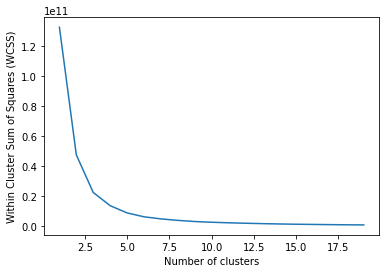

In [3]:
# Identify number of clusters to use in K-means using wcss-elbow method

# Select dataframe and columns to test
array = NBRR_oil[['GOR', 'WATER_YIELD']]

# Elbow test
N = 20 # maximum number of clusters to test
wcss = []
for n in range(1, N):
    kmeans = KMeans(n)
    kmeans.fit(array)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

# Plot results
cluster_ct = range(1, N)
plt.plot(cluster_ct, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')

<ipython-input-4-74c5e2d2aded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBRR_oil['Cluster_ID'] = cluster_id


Text(0, 0.5, 'Latitude')

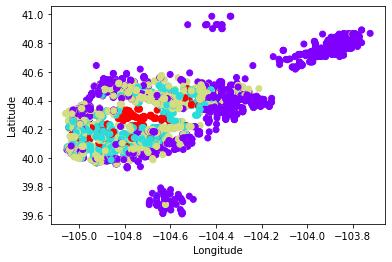

In [4]:
# Perform K-means calculations on selected array
clusters = KMeans(4).fit(array)
cluster_id = clusters.fit_predict(array)

# Add cluster id to dataframe (will generate warning, but there are no issues)
NBRR_oil['Cluster_ID'] = cluster_id

# Plot results
plt.scatter(NBRR_oil['Center_Lon'], NBRR_oil['Center_Lat'], c = NBRR_oil['Cluster_ID'], cmap = 'rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'GOR')

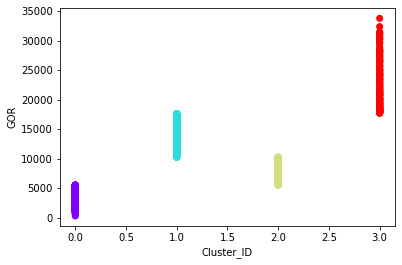

In [5]:
# Plot cluster id versus specific column
plt.scatter(NBRR_oil['Cluster_ID'], NBRR_oil['GOR'], c = NBRR_oil['Cluster_ID'], cmap = 'rainbow')
plt.xlabel('Cluster_ID')
plt.ylabel('GOR')

In [6]:
# View max values within specific columns for each cluster bin

NBRR_oil.pivot_table(['GOR', 'WATER_YIELD', 'SOPHIH'], aggfunc = 'max', index = 'Cluster_ID')

,GOR,SOPHIH,WATER_YIELD
Cluster_ID,,,
0,5513.15,4.526970,9723.776388
1,17641.33,5.782475,229.430012
2,10248.98,6.006726,406.704517
3,33774.66,5.729314,805.458232
